In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.patches as pt


In [2]:
def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)


In [3]:
min_val =1500
max_val = 3500
mean = 2500
std = 500
my_dist = my_distribution(min_val, max_val, mean, std)
x1 = my_dist.rvs(size=2000)
y1 = my_dist.rvs(size=2000)


In [4]:
min_val =0
max_val = 5000
mean = 2500
std = 1250
my_dist = my_distribution(min_val, max_val, mean, std)
x2 = my_dist.rvs(size=6000)
y2 = my_dist.rvs(size=6000)

In [5]:
x = np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

# Question 1

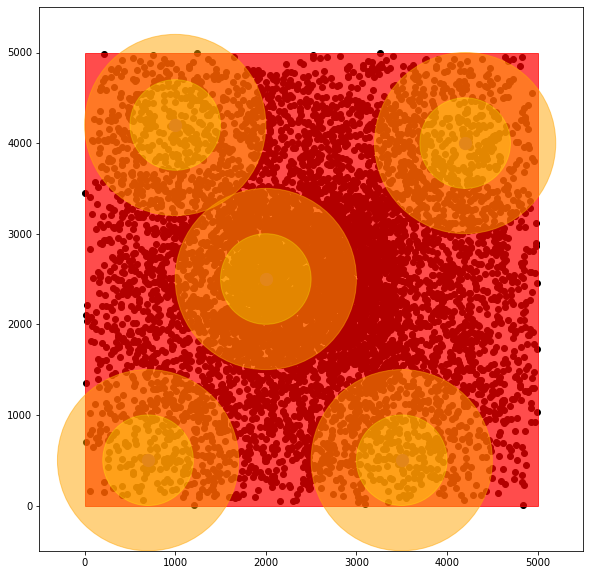

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

# fig.figsize=(500,500)
ax.set_ylim(-500,5500)
ax.set_xlim(-500,5500)
rect1 = pt.Rectangle((0,0), 5000, 5000, color='red',alpha=0.7)

ax.add_patch(rect1)

# ax.scatter(x1, y1,color='black')
# ax.scatter(x2, y2,color='black')
ax.scatter(x,y,color='black')

bank_A_x=2000
bank_A_y=2500
bank_B_x=4200
bank_B_y=4000
bank_C_x= 3500
bank_C_y=500
bank_D_x= 1000
bank_D_y=4200
bank_E_x= 700
bank_E_y=500


ax.scatter(bank_A_x,bank_A_y,color='blue',s=150)
ax.scatter(bank_B_x,bank_B_y,color='blue',s=150)
ax.scatter(bank_C_x,bank_C_y,color='blue',s=150)
ax.scatter(bank_D_x,bank_D_y,color='blue',s=150)
ax.scatter(bank_E_x,bank_E_y,color='blue',s=150)


Drawing_colored_circle1 = plt.Circle(( bank_A_x,bank_A_y ), 500,  fill = True,color='yellow',alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_A_x,bank_A_y ), 1000,  fill = True,color='orange' ,alpha=0.5) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 


Drawing_colored_circle1 = plt.Circle(( bank_B_x,bank_B_y ), 500,  fill = True,color='yellow',alpha=0.3 ) 
Drawing_colored_circle2 = plt.Circle(( bank_B_x,bank_B_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 )
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 


Drawing_colored_circle1 = plt.Circle(( bank_C_x,bank_C_y ), 500,  fill = True,color='yellow',alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_C_x,bank_C_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 



Drawing_colored_circle1 = plt.Circle(( bank_D_x,bank_D_y ), 500,  fill = True,color='yellow',alpha=0.3 ) 
Drawing_colored_circle2 = plt.Circle(( bank_D_x,bank_D_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 



Drawing_colored_circle1 = plt.Circle(( bank_E_x,bank_E_y ), 500,  fill = True,color='yellow' ,alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_E_x,bank_E_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 

ax.add_artist( Drawing_colored_circle1 ) 



plt.show()



## The areas filled by red color are the more appropriate areas for advertising. The red areas with the more population are prefereed. Then the orange areas and the yellow areas should be advertised

# Question 2 

In [7]:
def inside(x,y,radius):
    if ((x-bank_A_x)**2 + (y-bank_A_y)**2 <= radius**2)or((x-bank_B_x)**2 + (y-bank_B_y)**2 <= radius**2)or((x-bank_C_x)**2 + (y-bank_C_y)**2 <= radius**2) or  ((x-bank_D_x)**2 + (y-bank_D_y)**2 <= radius**2)  or((x-bank_E_x)**2 + (y-bank_E_y)**2 <= radius**2):
        return True
    return False


In [8]:
def inside_new(x,y,radius,x_bank_new,y_bank_new):
    if ((x-bank_A_x)**2 + (y-bank_A_y)**2 <= radius**2) or ((x-bank_B_x)**2 + (y-bank_B_y)**2 <= radius**2)or((x-bank_C_x)**2 + (y-bank_C_y)**2 <= radius**2) or  ((x-bank_D_x)**2 + (y-bank_D_y)**2 <= radius**2)  or((x-bank_E_x)**2 + (y-bank_E_y)**2 <= radius**2) or ((x-x_bank_new)**2 + (y-y_bank_new)**2 <= (radius**2)):
        return True
    return False

#

### total cost for the city

In [9]:
cost_old=[]
print(len(x))
for (x_home,y_home) in zip(x,y):
#     print(x_demand,y_demand)
#             print(x_demand,y_demand)
    if inside(x_home,y_home,500):
        cost_old.append(1)
    elif inside(x_home,y_home,1000):
        cost_old.append(3)
    else:
        cost_old.append(5)
        
sum(cost_old)

8000


27652

### This function calculates total cost in the city based on a s specific location for the new bank

In [17]:
def d_cost_location(args):
    x_bank_new=args[0]
    y_bank_new=args[1]
    cost_old=[]
    cost_new=[]
    sum_cost_old=[]
    sum_cost_new=[]
    
#     x_bank_new=i
#     y_bank_new=j
   
#     print(i,j)
    
    for (x_home,y_home) in zip(x,y):
        
        if inside_new(x_home,y_home,500,x_bank_new,y_bank_new):
            cost_new.append(1)
        elif inside_new(x_home,y_home,1000,x_bank_new,y_bank_new):
            cost_new.append(3)
        else:
            cost_new.append(5)

            
    return (sum(cost_new))

### find the location for the new bank that minimizes cost of the city

In [24]:
for k in range(10):
    minimum = optimize.fmin(d_cost_location, [np.random.randint(5000, size=1),np.random.randint(5000, size=1)],full_output=True)
    x_ans = minimum[0][0]
    y_ans = minimum[0][1]
    with open("Result.csv", "a") \
        as f:f.write(str(x_ans) + "," + str(y_ans)+ "," +str(minimum[1])+ '\n')

Optimization terminated successfully.
         Current function value: 23552.000000
         Iterations: 40
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 26310.000000
         Iterations: 36
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 23560.000000
         Iterations: 47
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 26284.000000
         Iterations: 59
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 23558.000000
         Iterations: 47
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 26436.000000
         Iterations: 46
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 23570.000000
         Iterations: 62
         Function evaluations: 151

In [19]:
df=pd.read_csv("Result.csv")

# print(df.loc[df['value']==df['value'].min(),'x'].head(1))# print( df[df['value']==df['value'].min()])
x_selected = float(df.loc[df['value']==df['value'].min(),'x'].head(1))
y_selected =float(df.loc[df['value']==df['value'].min(),'y'].head(1))

### show the new location for the bank on the city

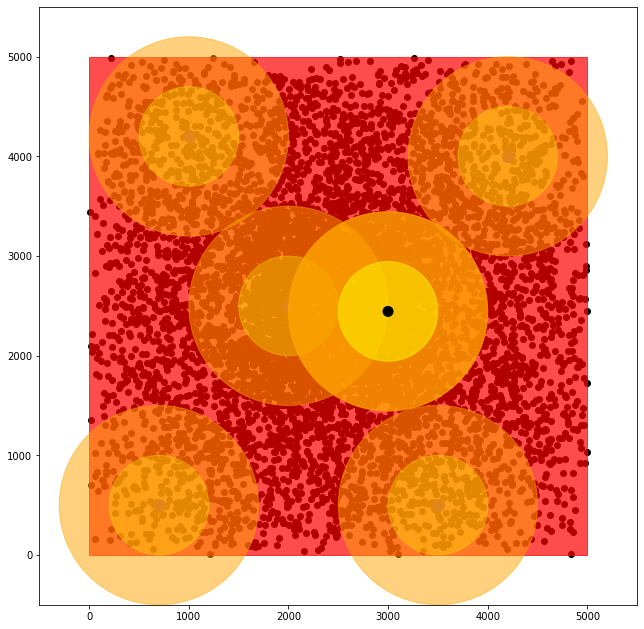

In [30]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(1, 1, 1)

# fig.figsize=(500,500)
ax.set_ylim(-500,5500)
ax.set_xlim(-500,5500)
ax.scatter(x,y,color='black')


bank_F_x= x_selected
bank_F_y=y_selected


ax.scatter(bank_A_x,bank_A_y,color='blue',s=150)
ax.scatter(bank_B_x,bank_B_y,color='blue',s=150)
ax.scatter(bank_C_x,bank_C_y,color='blue',s=150)
ax.scatter(bank_D_x,bank_D_y,color='blue',s=150)
ax.scatter(bank_E_x,bank_E_y,color='blue',s=150)



Drawing_colored_circle1 = plt.Circle(( bank_A_x,bank_A_y ), 500,  fill = True,color='yellow',alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_A_x,bank_A_y ), 1000,  fill = True,color='orange' ,alpha=0.5) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 


Drawing_colored_circle1 = plt.Circle(( bank_B_x,bank_B_y ), 500,  fill = True,color='yellow',alpha=0.3 ) 
Drawing_colored_circle2 = plt.Circle(( bank_B_x,bank_B_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 )
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 


Drawing_colored_circle1 = plt.Circle(( bank_C_x,bank_C_y ), 500,  fill = True,color='yellow',alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_C_x,bank_C_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 



Drawing_colored_circle1 = plt.Circle(( bank_D_x,bank_D_y ), 500,  fill = True,color='yellow',alpha=0.3 ) 
Drawing_colored_circle2 = plt.Circle(( bank_D_x,bank_D_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 



Drawing_colored_circle1 = plt.Circle(( bank_E_x,bank_E_y ), 500,  fill = True,color='yellow' ,alpha=0.3) 
Drawing_colored_circle2 = plt.Circle(( bank_E_x,bank_E_y ), 1000,  fill = True,color='orange' ,alpha=0.5 ) 
ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 




Drawing_colored_circle1 = plt.Circle(( bank_F_x,bank_F_y ), 500,  fill = True,color='yellow' ,alpha=0.5) 
Drawing_colored_circle2 = plt.Circle(( bank_F_x,bank_F_y ), 1000,  fill = True,color='orange' ,alpha=0.8 ) 
Drawing_colored_circle3 = plt.Circle(( bank_F_x,bank_F_y ), 50,  fill = True,color='black' ,alpha=1 ) 

ax.set_aspect( 1 ) 
ax.add_artist( Drawing_colored_circle2 ) 
ax.add_artist( Drawing_colored_circle1 ) 
ax.add_artist( Drawing_colored_circle3 ) 


rect1 = pt.Rectangle((0,0), 5000, 5000, color='red',alpha=0.7)

ax.add_patch(rect1)


plt.show()



## The black dot is the new Bank !

###  total cost for the city after establishing new bank

In [26]:
cost_after=[]
for (x_home,y_home) in zip(x,y):
    if ((x_home-bank_A_x)**2 + (y_home-bank_A_y)**2 <= 500**2) or ((x_home-bank_B_x)**2 + (y_home-bank_B_y)**2 <= 500**2) or ((x_home-bank_C_x)**2 + (y_home-bank_C_y)**2 <= 500**2) or  ((x_home-bank_D_x)**2 + (y_home-bank_D_y)**2 <= 500**2)  or ((x_home-bank_E_x)**2 + (y_home-bank_E_y)**2 <= 500**2) or ((x_home-bank_F_x)**2 + (y_home-bank_F_y)**2 <= (500**2)):
            cost_after.append(1)
    elif ((x_home-bank_A_x)**2 + (y_home-bank_A_y)**2 <= 1000**2)or((x_home-bank_B_x)**2 + (y_home-bank_B_y)**2 <= 1000**2)or((x_home-bank_C_x)**2 + (y_home-bank_C_y)**2 <= 1000**2) or  ((x_home-bank_D_x)**2 + (y_home-bank_D_y)**2 <= 1000**2)  or((x_home-bank_E_x)**2 + (y_home-bank_E_y)**2 <= 1000**2) or ((x_home-bank_F_x)**2 + (y_home-bank_F_y)**2 <= (1000**2)):
            cost_after.append(3)
    else:
            cost_after.append(5)
        
sum(cost_after)


23552